# Спины.

In [1]:
import numpy as np
import random

N = 25 # Размер решетки.

def Initial (N):
    
    M = np.random.randint ( 2 , size = ( N , N ) )
    
    return 2*M-1 


def Energy (State): # Эта функция оказалась бесполезной, но из неё понятно, как я разность энергий считаю.
    
    E = 0
    
    for i in range (N):
        
        for j in range (N):
            
            E += -1 * State [i , j] * ( State [(i+1)%N , j] + State [(i-1)%N , j] + State [i , (j+1)%N] + State [i , (j-1)%N] )
            
            # Здесь значки % помогают устроить периодические гранусловия.
            
    return E/4 # Возвращаем 1/4, т.к. одна связь принадлежит сразу двум спинам, и у каждого спина 4 соседа.

def Gibbs (State, b):
    
    for n in range (N**4): #всего N**2 спинов, значит N**4 шагов. За N**3 не сходится, проверил.
    
        i = np.random.randint (N)
        j = np.random.randint (N)
        
        dE =  -2 * ( State [(i+1)%N , j] + State [(i-1)%N , j] + State [i , (j+1)%N] + State [i , (j-1)%N] )
        
        p  = 1 / ( 1 + np.exp(   b * dE ) )
        
        #print(dE)
        #print(p)
            
        State[ i , j ] = 2 * np.random.binomial( 1 , p ) - 1
        
    return State 

def Spin (K, b):
    
    S = 0
    
    for k in range (K):
        
        I = Initial (N)
        
        State = Gibbs(I, b)
        
        S += np.mean ( State )
        
    return S / ( K )


Теперь мы готовы строить графики.

Хаотическое распределение для высоких температур:

0.0304


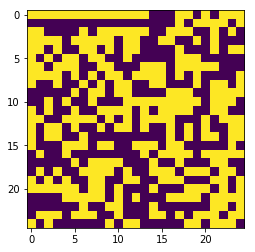

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

State = Gibbs( Initial (N), 0.001)


plt.imshow( State )

print ( np.mean(State) )

Упорядоченное для низких:

1.0


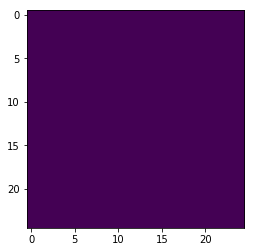

In [3]:
State = Gibbs( Initial (N), 1000)


plt.imshow( State )

print ( np.mean(State) )

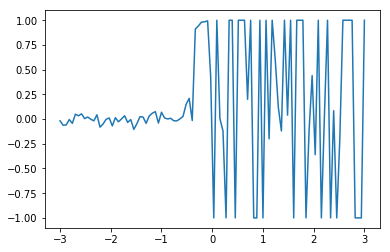

In [4]:
Q = 100

log_betas = np.linspace( -3 , 3 , Q ) # будем строить график для \beta от 10^-3 до 10^3 в логарифмической шкале

States = [ Gibbs(Initial (N), 10**log_betas[i] ) for i in range (Q) ]

means = [np.mean(States[i]) for i in range (Q)]

plt.plot(log_betas,means)


Крит. точка есть точка, в которой впервые происходит "спонтанное нарушение симметрии", т.е. спины выбирают сторону в которую выстроиться, чтобы минимизировать энергию. Найдем её вот как:

In [5]:
for i in range (Q):
    
    if np.abs( means[i] ) > 0.5:
        
        BetaCr = 10 ** log_betas[i]
        
        break  
        
print( BetaCr )        

0.4641588833612782


Построим типичные картинки вблизи крит.точки (вдали от неё построены выше)

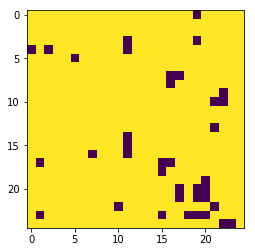

In [6]:
State = Gibbs( Initial (N), BetaCr)
plt.imshow( State )

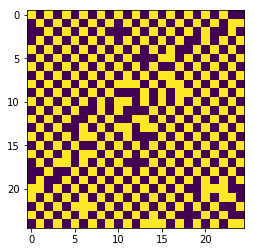

In [7]:
State = Gibbs( Initial (N), BetaCr-1)
plt.imshow( State )

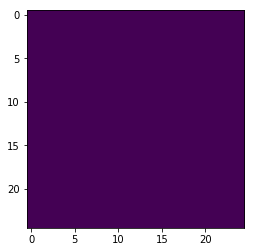

In [8]:
State = Gibbs( Initial (N), BetaCr+1)
plt.imshow( State )

Вот такие вот картинки. На графике зависимости среднего спина от $\beta$ имеются точки, в который средний спин близок к нулю, несмотря на то, что $\beta$ значительно выше критического. Вот так выглядят эти состояния:

0.0048


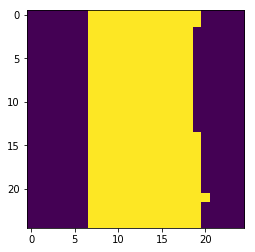

In [12]:
plt.imshow( States[52] )
print( np.mean( States[52] ) )

Т.е. тор спинов разбивается на два не чувствующих друг друга больших класстера примерно одинакового размера. Это, кажется, вполне естественно и не относится к реализации алгоритма или чему-то подобному. 